In [73]:
# Import packages.
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
from sympy import symbols, Eq, solve
from sympy import Matrix
import scipy as sp
# Load the .mat file.
mat_contents=sio.loadmat('./timescales_analysis_kohonen_ee.mat')

In [74]:
beta = mat_contents['beta'].squeeze()
c = mat_contents['c'].squeeze()
dt = mat_contents['dt'].squeeze()
dtRate = mat_contents['dtRate'].squeeze()
eRateT = mat_contents['eRateT']
iRateT = mat_contents['iRateT']
eta_ee_kohonen_vector = mat_contents['eta_ee_kohonen_vector'].squeeze()
Ie_current = mat_contents['Ie_current_eta']
Ii_current = mat_contents['Ii_current_eta']
Ix_current = mat_contents['Ix_current_eta']
Jm = mat_contents['Jm']
Jxm = mat_contents['Jxm']
mC = mat_contents['mC']
mean_Jee_recorded = mat_contents['mean_Jee_recorded']
mR = mat_contents['mR']
mV = mat_contents['mV']
N = mat_contents['N'].squeeze()
rx = mat_contents['rx'].squeeze()
seed = mat_contents['seed'].squeeze()
T = mat_contents['T'].squeeze()
T1 = mat_contents['T1'].squeeze()
T2 = mat_contents['T2'].squeeze()
tauSTDP = mat_contents['tauSTDP'].squeeze()
W = mat_contents['W']
winsize = mat_contents['winsize'].squeeze()
Wx = mat_contents['Wx']
time_axis = np.linspace(0,T/1000,len(mean_Jee_recorded[0,:]))

In [75]:
## Symbolic computation of the theoretical fixed point of the system for a set of different initial conditions.

jee = symbols('jee')
pex = 0.1; qx = 0.2;  qi = 0.2; qe = 0.8; pix=0.1;
pee = 0.1; pei = 0.1; pie = 0.1; pii = 0.1; jex = 180;
jix = 135; jei = -100; jie = 112.5; jii = -250;
taux = 10; taue = 8; taui = 4; tauc = 5;
wex = pex*qx*jex
wee = pee*qe*jee 
wix = pex*qi*jix 
wei = pei*qi*jei 
wie = pie*qe*jie 
wii = pii*qi*jii

W = Matrix(([wee, wei], [wie, wii]))
Wx = np.array([wex, wix]).reshape((2,1))

r = -W.inv() @ (Wx * rx )
eq1 = Eq( ((beta*np.sqrt(N))*tauSTDP*r[0,0]**2 - jee * r[0,0]) )
soln = solve(eq1,jee)[0]

J_ee_theory = soln
r_e_theory = r.subs(jee,J_ee_theory)[0]
r_i_theory = r.subs(jee,J_ee_theory)[1]
print(r_e_theory,r_i_theory)
print(J_ee_theory)

0.00749999999985258 0.0188999999997346
2.99999999917444


/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/sympy/core/relational.py:470: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


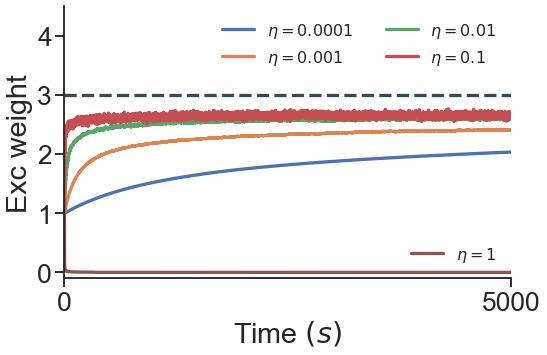

In [88]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.6, rc={"lines.linewidth":3.3})

# for i in range(len(mean_Jee_recorded[:,0])-2):
#     plt.plot(time_axis,mean_Jee_recorded[i,:])

line1, = plt.plot(time_axis,mean_Jee_recorded[0,:],label="$\eta=%.4f$" %eta_ee_kohonen_vector[0])
line2, = plt.plot(time_axis,mean_Jee_recorded[1,:],label="$\eta=%.3f$" %eta_ee_kohonen_vector[1])
line3, = plt.plot(time_axis,mean_Jee_recorded[2,:],label="$\eta=%.2f$" %eta_ee_kohonen_vector[2])
line4, = plt.plot(time_axis,mean_Jee_recorded[3,:],label="$\eta=%.1f$" %eta_ee_kohonen_vector[3])
line5, = plt.plot(time_axis,mean_Jee_recorded[4,:],color='tab:brown',
                  label="$\eta=%.0f$" %eta_ee_kohonen_vector[4])


plt.axhline(y=J_ee_theory,color='darkslategray',linestyle='--')

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Exc weight')

leg = plt.legend(handles=[line1,line2],loc='upper center',fontsize=16,frameon='none',markerscale=1)
leg.get_frame().set_linewidth(0.0)

ax = plt.gca().add_artist(leg)

leg1 = plt.legend(handles=[line3,line4],loc='upper right',fontsize=16,frameon='none',markerscale=1)
leg1.get_frame().set_linewidth(0.0)

ax = plt.gca().add_artist(leg1)

leg2 = plt.legend(handles=[line5],loc='lower right',fontsize=16,frameon='none',markerscale=1)
leg2.get_frame().set_linewidth(0.0)

plt.ylim((-.1,4.5))
plt.xlim((-0.1,T/1000))

plt.xticks((0,T/1000))
# plt.yticks((-150,-125,-100))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/timescale_kohonen.pdf", bbox_inches="tight")

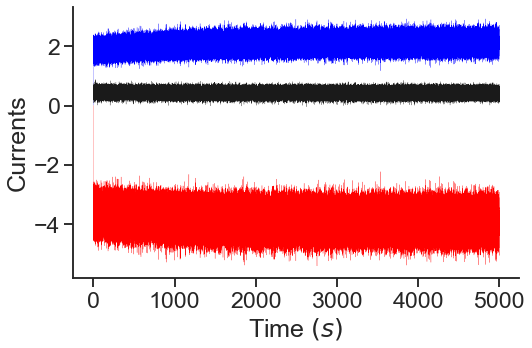

In [85]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":0.23})

# for i in range(len(Ie_current[:,0])-5):
#     plt.plot(time_axis,Ie_current[i,:],color='blue')
#     plt.plot(time_axis,Ii_current[i,:],color='red')
#     plt.plot(time_axis,Ie_current[i,:]+Ii_current[i,:]+Ix_current[i,:],color='k')
    
i=0
plt.plot(time_axis,Ie_current[i,:],color='blue')
plt.plot(time_axis,Ii_current[i,:],color='red')
plt.plot(time_axis,Ie_current[i,:]+Ii_current[i,:]+Ix_current[i,:],color='k')

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Currents')

sns.despine()
plt.show()


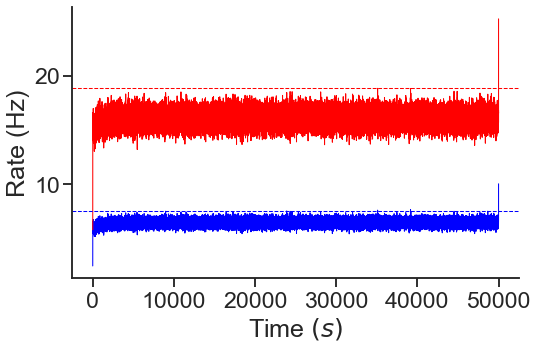

In [86]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":1.03})

# for i in range(len(Ie_current[:,0])-8):
#     plt.plot(1000*eRateT[i,:],color='blue')
#     plt.plot(1000*iRateT[i,:],color='red')
    
i=1
plt.plot(1000*eRateT[i,:],color='blue')
plt.plot(1000*iRateT[i,:],color='red')
    
plt.axhline(y=1000*r_e_theory,color='blue',linestyle='--')
plt.axhline(y=1000*r_i_theory,color='red',linestyle='--')

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Rate (Hz)')

sns.despine()
plt.show()

# fig.savefig("./Cosyne20_figs/corr_heatmap.pdf", bbox_inches="tight")
